<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-I/blob/main/IntegracionMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Monte Carlo de la Media Muestral.

### Queremos calcular:
$$I=\int _{0}^{1}\sqrt{arctan(x)} dx$$

Con: $$\theta_1=(b-a)\frac{1}{n} \sum_{i=1}^{n}g(X_i) \quad con \quad X_i\sim U(0,1) $$

$$y \quad g(x)=\sqrt{arctan(x)}$$

Donde $\theta_1$ es nuestro estimador.

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.integrate as spi

In [249]:
a=0
b=1
N=500

In [250]:
#Definimos g(x)
def f(x):
  return (np.arctan(x))**(1/2)

In [251]:
def estimacion(N,a,b):
  gs=[]
  l=[]
  for i in range(N):
    U=np.random.uniform() #generamos un numero random
    X=a + U*(b-a)
    g=f(X)
    gs.append(g)
    suma=sum(gs)
    theta=(b-a)/(i+1)*suma #guardamos las probabilidades
    l.append(theta)


  return l

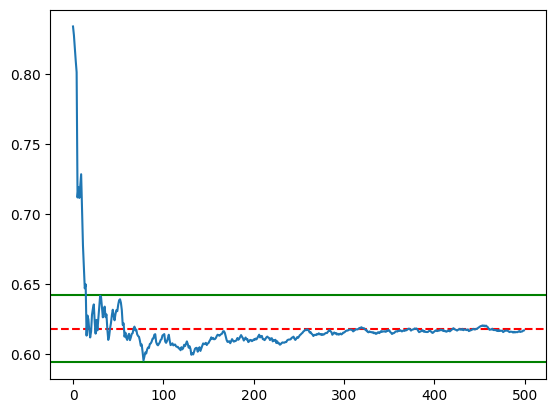

In [252]:
G=estimacion(N,a,b)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media


plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()

Estimamos un intervalo de confianza del 90% y dado que $n\geq 30$:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [282]:
# Calculando el valor crítico de la distribución
p=0.90
error_estandar = desv / (N**0.5)
valor_critico = stats.norm.ppf((1 + p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 90.0%: (0.6390483358364114, 0.6423142884234581)


In [254]:
N=50 #tamaño de la muestra

In [255]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimacion(N,a,b)
    r.append(R[-1])
  return r

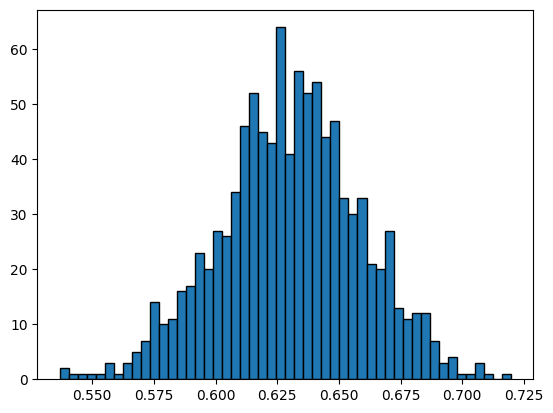

In [256]:
S1=simulacion(1000)
plt.hist(S1, bins=50,edgecolor="black")
plt.show()


In [283]:
MC_MediaM=np.mean(S1)
print(MC_MediaM)

0.6302998944459755


### Prueba K-S Para saber si sigue una distribucion normal

In [258]:
#kstest realiza la prueba K-S
estadistico,pvalue = stats.kstest(S1, 'norm')

print("Estadístico de prueba:", estadistico)
print("Valor p: ", pvalue )
if resultado.pvalue < 0.05:
    print("La muestra no proviene de una distribución normal.")
else:
    print("La muestra proviene de una distribución normal.")

Estadístico de prueba: 0.7048316072286575
Valor p:  0.0
La muestra no proviene de una distribución normal.


Nota:Puede que el uso de la funcion este mal implementada por ser novel en el uso de la libreria

#Metodo de Acierto y Error.



Queremos calcular:
$$I=\int _{0}^{1}\sqrt{arctan(x)} dx$$
$$y \quad g(x)=\sqrt{arctan(x)}$$

Con:$$c=g(1)$$

Ademas: $$p=\frac{n}{N}$$
$$n: \text{numero de aciertos}$$
$$N: \text{Numero de experimentos}$$
Donde $p$ estima la integral.

In [275]:
def estimacion2(N,a,b):
  l=[]

  c=f(b)  #dado que la funcion esta acotada, esta alcanza su maximo en el limite superior
  n=0
  for i in range(N):
    U1=np.random.uniform()
    U2=np.random.uniform()
    X=a + U1*(b-a)
    g=f(X)


    if g>c*U2: #condicion de exitos
      n+=1     #numero de exitos
      theta=(c*(b-a))*(n/((i+1))) #Guardamos probabilidades
      l.append(theta)
  return l

##Grafica de la funcion.

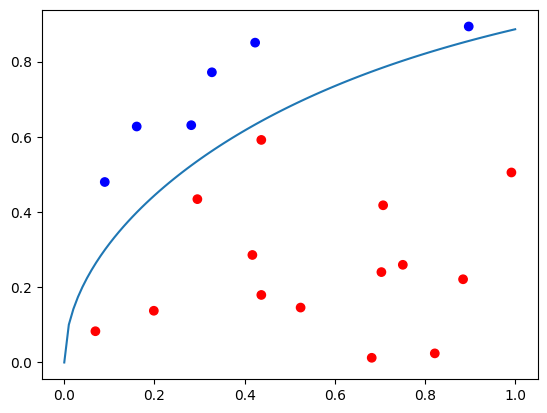

In [276]:
# Puntos aleatorios
U1 = np.random.uniform(size=20)
U2 = np.random.uniform(size=20)

# Evaluamos la función en U1
y_values = f(U1)

# Compara U2 con los valores de la función
colors = ["red" if u2 < y else "blue" for u2, y in zip(U2, y_values)]

# Grafica la función
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), label=r"$\sqrt{\arctan(x)}$")

# Gráfico de dispersión con colores diferentes
plt.scatter(U1, U2, color=colors)

In [277]:
N=500

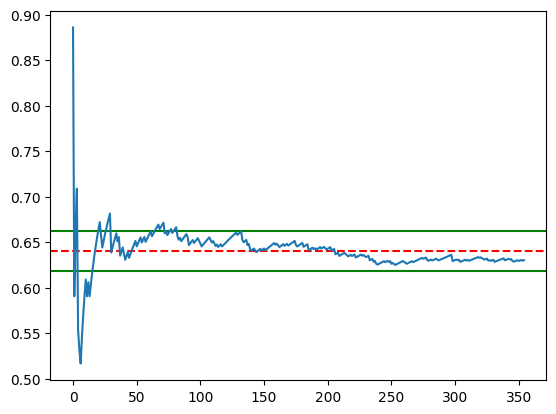

In [278]:
G=estimacion2(N,a,b)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media
#Graficamos un intervalo de confianza de un error estandar
plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()

Estimamos un intervalo de confianza del 90%:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [280]:
# Calculando el valor crítico
p=0.90
error_estandar = desv / (N**0.5)
valor_critico = stats.norm.ppf((1 + p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 90.0%: (0.6390483358364114, 0.6423142884234581)


In [264]:
N=50

In [265]:
def simulacion2(M):
  r=[]
  for i in range(M):
    R=estimacion2(N,a,b)
    r.append(R[-1])
  return r

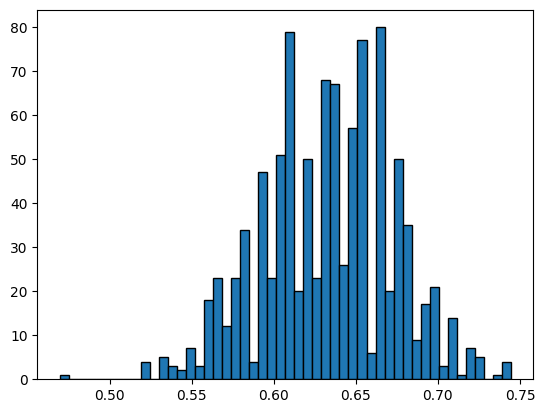

In [266]:
S=simulacion2(1000)
plt.hist(S, bins=50,edgecolor="black")
plt.show()

In [267]:
MC_AciertoE=np.mean(S)
print(MC_AciertoE)

0.6326842559469452


### Prueba K-S para saber si sigue una distribucion normal.

In [268]:
resultado = stats.kstest(S, 'norm')


# Imprimiendo el resultado
print("Estadístico de prueba:", resultado.statistic)
print(f"Valor p:{resultado.pvalue:.3f}" )
if resultado.pvalue < 0.05:
    print("La muestra no proviene de una distribución normal.")
else:
    print("La muestra proviene de una distribución normal.")

Estadístico de prueba: 0.6975456264712175
Valor p:0.000
La muestra no proviene de una distribución normal.


Nota:Puede que el uso de la funcion este mal implementada por ser novel en el uso de la libreria

##Comparacion de los metodos


In [284]:
print("para n=1000")
print("MC MEdia muestral: ",MC_MediaM)
print("MC Acierto error: ",MC_AciertoE)

para n=1000
MC MEdia muestral:  0.6302998944459755
MC Acierto error:  0.6326842559469452
